<a href="https://colab.research.google.com/github/Lee-Gunju/AI-paper-code-review-for-personal-project/blob/master/Graph_representation_learning_with_node2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install networkx


In [ ]:
import os
from collections import defaultdict
import math
import networkx as nx
import random
from tqdm import tqdm
from zipfile import ZipFile
from urllib.request import urlretrieve
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
urlretrieve("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip", "movielens.zip")
ZipFile("movielens.zip", "r").extractall()

In [ ]:
# Load movies to a DataFrame.
movies = pd.read_csv("ml-latest-small/movies.csv")

In [ ]:
movies['movieId'] = movies['movieId'].apply(lambda x: f"movie_{x}")

In [ ]:
# Load ratings to a DataFrame.
ratings = pd.read_csv("ml-latest-small/ratings.csv")

In [ ]:
ratings['rating'] = ratings['rating'].apply(lambda x: float(x))
ratings['movieId'] = ratings['movieId'].apply(lambda x: f"movie_{x}")

In [ ]:
print("Movies data shape:", movies.shape)
print("Ratings data shape:", ratings.shape)

Movies data shape: (9742, 3)
Ratings data shape: (100836, 4)


In [ ]:
def get_movie_title_by_id(movieId):
  return list(movies[movies.movieId == movieId].title)[0]


def get_movie_id_by_title(title):
  return list(movies[movies.title == title].movieId)[0]

In [ ]:
movies

,movieId,title,genres
0,movie_1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,movie_2,Jumanji (1995),Adventure|Children|Fantasy
2,movie_3,Grumpier Old Men (1995),Comedy|Romance
3,movie_4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,movie_5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,movie_193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,movie_193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,movie_193585,Flint (2017),Drama
9740,movie_193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,movie_1,4.0,964982703
1,1,movie_3,4.0,964981247
2,1,movie_6,4.0,964982224
3,1,movie_47,5.0,964983815
4,1,movie_50,5.0,964982931
...,...,...,...,...
100831,610,movie_166534,4.0,1493848402
100832,610,movie_168248,5.0,1493850091
100833,610,movie_168250,5.0,1494273047
100834,610,movie_168252,5.0,1493846352


In [ ]:
min_rating = 5
pair_frequency = defaultdict(int)
item_frequency = defaultdict(int)

# Filter instances where rating is greater than or equal to min_rating.
rated_movies = ratings[ratings.rating >= min_rating]
# Group instances by user.
movies_grouped_by_users = list(rated_movies.groupby("userId"))
for group in tqdm(
    movies_grouped_by_users,
    position=0,
    leave=True,
    desc="Compute movie rating frequencies",
):
    # Get a list of movies rated by the user.
    current_movies = list(group[1]["movieId"])

    for i in range(len(current_movies)):
        item_frequency[current_movies[i]] += 1
        for j in range(i + 1, len(current_movies)):
            x = min(current_movies[i], current_movies[j])
            y = max(current_movies[i], current_movies[j])
            pair_frequency[(x, y)] += 1

Compute movie rating frequencies: 100%|██████████| 573/573 [00:00<00:00, 1060.47it/s]


In [ ]:
current_movies

['movie_1',
 'movie_6',
 'movie_47',
 'movie_111',
 'movie_194',
 'movie_215',
 'movie_260',
 'movie_293',
 'movie_296',
 'movie_377',
 'movie_380',
 'movie_407',
 'movie_441',
 'movie_480',
 'movie_541',
 'movie_589',
 'movie_778',
 'movie_784',
 'movie_858',
 'movie_903',
 'movie_904',
 'movie_1036',
 'movie_1089',
 'movie_1136',
 'movie_1196',
 'movie_1198',
 'movie_1200',
 'movie_1201',
 'movie_1208',
 'movie_1209',
 'movie_1210',
 'movie_1213',
 'movie_1218',
 'movie_1221',
 'movie_1228',
 'movie_1240',
 'movie_1241',
 'movie_1245',
 'movie_1247',
 'movie_1258',
 'movie_1261',
 'movie_1270',
 'movie_1273',
 'movie_1274',
 'movie_1279',
 'movie_1394',
 'movie_1676',
 'movie_1682',
 'movie_1884',
 'movie_1923',
 'movie_1953',
 'movie_1967',
 'movie_2000',
 'movie_2028',
 'movie_2076',
 'movie_2288',
 'movie_2571',
 'movie_2716',
 'movie_2916',
 'movie_2924',
 'movie_2959',
 'movie_2968',
 'movie_2985',
 'movie_3114',
 'movie_3246',
 'movie_3265',
 'movie_3328',
 'movie_3362',
 'movi

In [ ]:
item_frequency

defaultdict(int,
            {'movie_47': 52,
             'movie_50': 71,
             'movie_101': 5,
             'movie_151': 7,
             'movie_157': 1,
             'movie_163': 11,
             'movie_216': 7,
             'movie_231': 14,
             'movie_260': 104,
             'movie_333': 14,
             'movie_362': 7,
             'movie_457': 46,
             'movie_527': 92,
             'movie_553': 15,
             'movie_596': 7,
             'movie_608': 57,
             'movie_661': 8,
             'movie_919': 26,
             'movie_923': 22,
             'movie_940': 3,
             'movie_954': 5,
             'movie_1023': 3,
             'movie_1024': 1,
             'movie_1025': 3,
             'movie_1029': 3,
             'movie_1031': 5,
             'movie_1032': 2,
             'movie_1049': 4,
             'movie_1073': 27,
             'movie_1080': 23,
             'movie_1089': 45,
             'movie_1092': 1,
             'movie_1097': 28,

In [ ]:
pair_frequency

defaultdict(int,
            {('movie_47', 'movie_50'): 17,
             ('movie_101', 'movie_47'): 2,
             ('movie_151', 'movie_47'): 4,
             ('movie_157', 'movie_47'): 1,
             ('movie_163', 'movie_47'): 4,
             ('movie_216', 'movie_47'): 3,
             ('movie_231', 'movie_47'): 7,
             ('movie_260', 'movie_47'): 16,
             ('movie_333', 'movie_47'): 5,
             ('movie_362', 'movie_47'): 2,
             ('movie_457', 'movie_47'): 12,
             ('movie_47', 'movie_527'): 11,
             ('movie_47', 'movie_553'): 2,
             ('movie_47', 'movie_596'): 3,
             ('movie_47', 'movie_608'): 10,
             ('movie_47', 'movie_661'): 2,
             ('movie_47', 'movie_919'): 2,
             ('movie_47', 'movie_923'): 2,
             ('movie_47', 'movie_940'): 1,
             ('movie_47', 'movie_954'): 1,
             ('movie_1023', 'movie_47'): 1,
             ('movie_1024', 'movie_47'): 1,
             ('movie_1025', 'mo

In [ ]:
min_weight = 10
D = math.log(sum(item_frequency.values()))

# Create the movies undirected graph.
movies_graph = nx.Graph()
# Add weighted edges between movies.
# This automatically adds the movie nodes to the graph.
for pair in tqdm(
    pair_frequency, position=0, leave=True, desc="Creating the movie graph"
):
    x, y = pair
    xy_frequency = pair_frequency[pair]
    x_frequency = item_frequency[x]
    y_frequency = item_frequency[y]
    pmi = math.log(xy_frequency) - math.log(x_frequency) - math.log(y_frequency) + D
    weight = pmi * xy_frequency
    # Only include edges with weight >= min_weight.
    if weight >= min_weight:
        movies_graph.add_edge(x, y, weight=weight)

Creating the movie graph: 100%|██████████| 298586/298586 [00:00<00:00, 578407.26it/s]


In [ ]:
movies_graph.nodes(data= True)

NodeDataView({'movie_47': {}, 'movie_50': {}, 'movie_151': {}, 'movie_163': {}, 'movie_216': {}, 'movie_231': {}, 'movie_260': {}, 'movie_333': {}, 'movie_457': {}, 'movie_527': {}, 'movie_596': {}, 'movie_608': {}, 'movie_1029': {}, 'movie_1073': {}, 'movie_1080': {}, 'movie_1089': {}, 'movie_1136': {}, 'movie_1196': {}, 'movie_1197': {}, 'movie_1198': {}, 'movie_1206': {}, 'movie_1210': {}, 'movie_1213': {}, 'movie_1220': {}, 'movie_1222': {}, 'movie_1240': {}, 'movie_1270': {}, 'movie_1275': {}, 'movie_1278': {}, 'movie_1291': {}, 'movie_1517': {}, 'movie_1573': {}, 'movie_1617': {}, 'movie_1625': {}, 'movie_1732': {}, 'movie_2005': {}, 'movie_2094': {}, 'movie_2115': {}, 'movie_2116': {}, 'movie_2329': {}, 'movie_2387': {}, 'movie_2459': {}, 'movie_2470': {}, 'movie_2502': {}, 'movie_2529': {}, 'movie_2542': {}, 'movie_2571': {}, 'movie_2700': {}, 'movie_2716': {}, 'movie_2858': {}, 'movie_2949': {}, 'movie_2959': {}, 'movie_2987': {}, 'movie_3033': {}, 'movie_3052': {}, 'movie_314

In [ ]:
print("Total number of graph nodes:", movies_graph.number_of_nodes())
print("Total number of graph edges:", movies_graph.number_of_edges())

Total number of graph nodes: 1405
Total number of graph edges: 40043


In [ ]:
degrees = []

for node in movies_graph.nodes:
  degrees.append(movies_graph.degree[node])


print("Average node degree:", round(sum(degrees) / len(degrees), 2))


Average node degree: 57.0


In [ ]:
vocabulary = ["NA"] + list(movies_graph.nodes)
vocabulary_lookup = {token: idx for idx, token in enumerate(vocabulary)}

In [ ]:
vocabulary_lookup

{'NA': 0,
 'movie_47': 1,
 'movie_50': 2,
 'movie_151': 3,
 'movie_163': 4,
 'movie_216': 5,
 'movie_231': 6,
 'movie_260': 7,
 'movie_333': 8,
 'movie_457': 9,
 'movie_527': 10,
 'movie_596': 11,
 'movie_608': 12,
 'movie_1029': 13,
 'movie_1073': 14,
 'movie_1080': 15,
 'movie_1089': 16,
 'movie_1136': 17,
 'movie_1196': 18,
 'movie_1197': 19,
 'movie_1198': 20,
 'movie_1206': 21,
 'movie_1210': 22,
 'movie_1213': 23,
 'movie_1220': 24,
 'movie_1222': 25,
 'movie_1240': 26,
 'movie_1270': 27,
 'movie_1275': 28,
 'movie_1278': 29,
 'movie_1291': 30,
 'movie_1517': 31,
 'movie_1573': 32,
 'movie_1617': 33,
 'movie_1625': 34,
 'movie_1732': 35,
 'movie_2005': 36,
 'movie_2094': 37,
 'movie_2115': 38,
 'movie_2116': 39,
 'movie_2329': 40,
 'movie_2387': 41,
 'movie_2459': 42,
 'movie_2470': 43,
 'movie_2502': 44,
 'movie_2529': 45,
 'movie_2542': 46,
 'movie_2571': 47,
 'movie_2700': 48,
 'movie_2716': 49,
 'movie_2858': 50,
 'movie_2949': 51,
 'movie_2959': 52,
 'movie_2987': 53,
 'movi

In [ ]:
def next_step(graph, previous, current, p, q):
    neighbors = list(graph.neighbors(current))

    weights = []
    # Adjust the weights of the edges to the neighbors with respect to p and q.
    for neighbor in neighbors:
        if neighbor == previous:
            # Control the probability to return to the previous node.
            weights.append(graph[current][neighbor]["weight"] / p)
        elif graph.has_edge(neighbor, previous):
            # The probability of visiting a local node.
            weights.append(graph[current][neighbor]["weight"])
        else:
            # Control the probability to move forward.
            weights.append(graph[current][neighbor]["weight"] / q)

    # Compute the probabilities of visiting each neighbor.
    weight_sum = sum(weights)
    probabilities = [weight / weight_sum for weight in weights]
    # Probabilistically select a neighbor to visit.
    next = np.random.choice(neighbors, size=1, p=probabilities)[0]
    return next


def random_walk(graph, num_walks, num_steps, p, q):
    walks = []
    nodes = list(graph.nodes())
    # Perform multiple iterations of the random walk.
    for walk_iteration in range(num_walks):
        random.shuffle(nodes)

        for node in tqdm(
            nodes,
            position=0,
            leave=True,
            desc=f"Random walks iteration {walk_iteration + 1} of {num_walks}",
        ):
            # Start the walk with a random node from the graph.
            walk = [node]
            # Randomly walk for num_steps.
            while len(walk) < num_steps:
                current = walk[-1]
                previous = walk[-2] if len(walk) > 1 else None
                # Compute the next node to visit.
                next = next_step(graph, previous, current, p, q)
                walk.append(next)
            # Replace node ids (movie ids) in the walk with token ids.
            walk = [vocabulary_lookup[token] for token in walk]
            # Add the walk to the generated sequence.
            walks.append(walk)

    return walks


In [ ]:
# Random walk return parameter.
p = 1
# Random walk in-out parameter.
q = 1
# Number of iterations of random walks.
num_walks = 5
# Number of steps of each random walk.
num_steps = 10

walks = random_walk(movies_graph, num_walks, num_steps, p, q)

Random walks iteration 5 of 5: 100%|██████████| 1405/1405 [00:05<00:00, 251.03it/s]


In [ ]:
print("Number of walks generated:", len(walks))

Number of walks generated: 7025


In [ ]:
walks

[[704, 700, 294, 542, 576, 582, 120, 227, 1153, 17],
 [295, 165, 83, 16, 200, 260, 125, 171, 213, 461],
 [536, 505, 176, 7, 173, 514, 7, 244, 187, 97],
 [1231, 798, 20, 26, 585, 562, 23, 406, 24, 656],
 [271, 263, 658, 661, 422, 1203, 395, 670, 23, 504],
 [968, 127, 692, 641, 211, 940, 268, 257, 744, 317],
 [1168, 322, 550, 607, 720, 598, 1110, 617, 343, 321],
 [808, 15, 110, 743, 26, 83, 272, 10, 47, 503],
 [1278, 740, 273, 337, 858, 407, 35, 239, 257, 261],
 [1, 16, 25, 780, 408, 294, 227, 607, 344, 321],
 [555, 332, 294, 200, 160, 16, 307, 306, 27, 47],
 [1063, 1064, 137, 122, 1027, 714, 355, 67, 405, 561],
 [383, 448, 53, 63, 1209, 249, 613, 340, 1121, 415],
 [169, 174, 398, 176, 531, 754, 284, 290, 198, 18],
 [433, 18, 176, 317, 220, 20, 260, 726, 10, 172],
 [1340, 23, 223, 22, 18, 21, 428, 50, 7, 407],
 [985, 238, 74, 16, 566, 127, 15, 413, 461, 1373],
 [1104, 382, 1104, 23, 504, 256, 238, 260, 244, 224],
 [525, 599, 213, 309, 307, 1063, 25, 245, 847, 948],
 [1013, 367, 337, 1355

In [ ]:
def generate_examples(sequences, window_size, num_negative_samples, vocabulary_size):
    example_weights = defaultdict(int)
    # Iterate over all sequences (walks).
    for sequence in tqdm(
        sequences,
        position=0,
        leave=True,
        desc=f"Generating postive and negative examples",
    ):
        # Generate positive and negative skip-gram pairs for a sequence (walk).
        pairs, labels = keras.preprocessing.sequence.skipgrams(
            sequence,
            vocabulary_size=vocabulary_size,
            window_size=window_size,
            negative_samples=num_negative_samples,
        )
        for idx in range(len(pairs)):
            pair = pairs[idx]
            label = labels[idx]
            target, context = min(pair[0], pair[1]), max(pair[0], pair[1])
            if target == context:
                continue
            entry = (target, context, label)
            example_weights[entry] += 1

    targets, contexts, labels, weights = [], [], [], []
    for entry in example_weights:
        weight = example_weights[entry]
        target, context, label = entry
        targets.append(target)
        contexts.append(context)
        labels.append(label)
        weights.append(weight)

    return np.array(targets), np.array(contexts), np.array(labels), np.array(weights)



num_negative_samples = 4
targets, contexts, labels, weights = generate_examples(
    sequences=walks,
    window_size=num_steps,
    num_negative_samples=num_negative_samples,
    vocabulary_size=len(vocabulary),
)

Generating postive and negative examples: 100%|██████████| 7025/7025 [00:13<00:00, 539.02it/s]


In [ ]:
targets

array([ 108,  294,  120, ...,  695,   31, 1144])

In [ ]:
contexts

array([ 576, 1153,  239, ..., 1162, 1097, 1162])

In [ ]:
labels

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
weights

array([3, 8, 4, ..., 1, 1, 1])

In [ ]:
print(f"Targets shape: {targets.shape}")
print(f"Contexts shape: {contexts.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Weights shape: {weights.shape}")

Targets shape: (881140,)
Contexts shape: (881140,)
Labels shape: (881140,)
Weights shape: (881140,)


In [ ]:
batch_size = 1024

def create_dataset(targets, contexts, labels, weights, batch_size):
    inputs = {
        "target": targets,
        "context": contexts,
    }
    dataset = tf.data.Dataset.from_tensor_slices((inputs, labels, weights))
    dataset = dataset.shuffle(buffer_size=batch_size * 2)
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

dataset = create_dataset(
    targets=targets,
    contexts=contexts,
    labels=labels,
    weights=weights,
    batch_size=batch_size,
)


In [ ]:
learning_rate = 0.001
embedding_dim = 50
num_epochs = 10

In [ ]:
a = [3,4,5,6,4]
a = np.array(a)
emb = layers.Embedding(input_dim=10, output_dim=5)
emb(a)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[ 0.04006952,  0.04560072,  0.04400093, -0.01637598, -0.0378172 ],
       [-0.00561135, -0.02289528, -0.00162461, -0.04979474, -0.03583171],
       [ 0.00336713,  0.03009898, -0.03586362,  0.02979866,  0.02268839],
       [-0.00748284, -0.03193908, -0.0050864 ,  0.04336831, -0.00785973],
       [-0.00561135, -0.02289528, -0.00162461, -0.04979474, -0.03583171]],
      dtype=float32)>

In [ ]:
emb.get_weights()

[array([[-0.03211771, -0.04106522, -0.03618496, -0.0081013 ,  0.03762746],
        [ 0.0310137 ,  0.04768883,  0.0470047 ,  0.01277034,  0.02579892],
        [ 0.04602701,  0.03692554, -0.03593091,  0.03584037,  0.01297287],
        [ 0.04006952,  0.04560072,  0.04400093, -0.01637598, -0.0378172 ],
        [-0.00561135, -0.02289528, -0.00162461, -0.04979474, -0.03583171],
        [ 0.00336713,  0.03009898, -0.03586362,  0.02979866,  0.02268839],
        [-0.00748284, -0.03193908, -0.0050864 ,  0.04336831, -0.00785973],
        [ 0.00552959,  0.03553978, -0.01406423, -0.03847804,  0.03216794],
        [-0.03512483,  0.00161093,  0.0214732 , -0.0499207 , -0.0195174 ],
        [-0.0107919 , -0.01587664,  0.04250398,  0.03939212, -0.02772729]],
       dtype=float32)]

In [ ]:
def create_model(vocabulary_size, embedding_dim):
  inputs = {
      'target': layers.Input(name = 'target', shape=(), dtype='int32'),
      'context': layers.Input(name = 'context', shape = (), dtype='int32'),
  }
  # Initialize item embeddings.
  embed_item = layers.Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, embeddings_initializer='he_normal', embeddings_regularizer=keras.regularizers.l2(1e-6),name= 'item_embeddings')

  # Lookup embeddings for target.
  target_embeddings = embed_item(inputs["target"])
  # Lookup embeddings for context.
  context_embeddings = embed_item(inputs["context"])

  # Compute dot similarity between target and context embeddings.
  logits = layers.Dot(axes=1, normalize=False, name = 'dot_similarity')([target_embeddings, context_embeddings])

  model = keras.Model(inputs = inputs, outputs = logits)
  return model

In [ ]:
model = create_model(len(vocabulary), embedding_dim)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
)

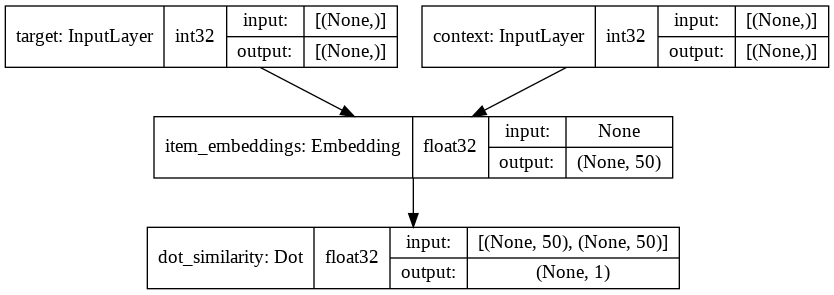

In [ ]:
keras.utils.plot_model(
    model, show_shapes=True, show_dtype=True, show_layer_names=True,
)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
target (InputLayer)             [(None,)]            0                                            
__________________________________________________________________________________________________
context (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
item_embeddings (Embedding)     (None, 50)           70300       target[0][0]                     
                                                                 context[0][0]                    
__________________________________________________________________________________________________
dot_similarity (Dot)            (None, 1)            0           item_embeddings[0][0]        

In [ ]:
history = model.fit(dataset, epochs=num_epochs)


Epoch 1/10
860/860 [==============================] - 6s 3ms/step - loss: 3.5193
Epoch 2/10
860/860 [==============================] - 3s 3ms/step - loss: 3.3543
Epoch 3/10
860/860 [==============================] - 3s 3ms/step - loss: 3.3336
Epoch 4/10
860/860 [==============================] - 3s 3ms/step - loss: 3.3208
Epoch 5/10
860/860 [==============================] - 3s 3ms/step - loss: 3.3102
Epoch 6/10
860/860 [==============================] - 3s 3ms/step - loss: 3.2995
Epoch 7/10
860/860 [==============================] - 3s 3ms/step - loss: 3.2895
Epoch 8/10
860/860 [==============================] - 3s 3ms/step - loss: 3.2800
Epoch 9/10
860/860 [==============================] - 3s 3ms/step - loss: 3.2719
Epoch 10/10
860/860 [==============================] - 3s 3ms/step - loss: 3.2661


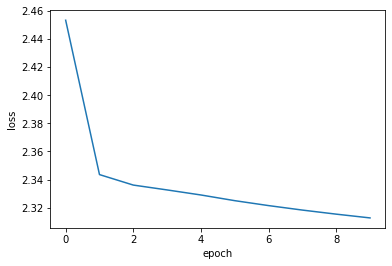

In [ ]:
plt.plot(history.history["loss"])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

In [ ]:
movie_embeddings = model.get_layer("item_embeddings").get_weights()[0]
print("Embeddings shape:", movie_embeddings.shape)

Embeddings shape: (1406, 50)


In [ ]:
query_movies = [
    "Matrix, The (1999)",
    "Star Wars: Episode IV - A New Hope (1977)",
    "Lion King, The (1994)",
    "Terminator 2: Judgment Day (1991)",
    "Godfather, The (1972)",
]

In [ ]:
query_embeddings = []

for movie_title in query_movies:
  movieId = get_movie_id_by_title(movie_title)
  token_id = vocabulary_lookup[movieId]
  movie_embedding = movie_embeddings[token_id]
  query_embeddings.append(movie_embedding)

query_embeddings = np.array(query_embeddings)


In [ ]:
query_embeddings.shape

(5, 50)

In [ ]:
similarities = tf.linalg.matmul(
    tf.math.l2_normalize(query_embeddings),
    tf.math.l2_normalize(movie_embeddings),
    transpose_b=True,
)

In [ ]:
similarities

<tf.Tensor: shape=(5, 1406), dtype=float32, numpy=
array([[ 2.2250896e-32,  1.3324729e-02,  1.2874503e-02, ...,
        -2.2473000e-03, -7.4883858e-03, -5.9116366e-03],
       [ 1.0201971e-32,  1.3049156e-02,  1.3190585e-02, ...,
        -1.5866185e-03, -7.2288783e-03, -5.8850315e-03],
       [ 5.0024255e-32,  1.5250444e-02,  1.1637484e-02, ...,
        -3.2705080e-03, -8.9838505e-03, -7.1578310e-03],
       [ 4.2023532e-32,  1.5282999e-02,  1.3737689e-02, ...,
        -2.4338046e-03, -8.3069736e-03, -6.7894538e-03],
       [-2.2780281e-32,  1.2323471e-02,  1.3087048e-02, ...,
         4.8866420e-04, -6.4552091e-03, -4.3746103e-03]], dtype=float32)>

In [ ]:
_, indices = tf.math.top_k(similarities, k=5)

In [ ]:
indices = indices.numpy().tolist()

AttributeError: ignored

In [ ]:
indices[3]

[244, 183, 187, 181, 1]

In [ ]:
for idx, title in enumerate(query_movies):
    print(title)
    print("".rjust(len(title), "-"))
    similar_tokens = indices[idx]
    for token in similar_tokens:
      similar_movieId = vocabulary[token]
      similar_title = get_movie_title_by_id(similar_movieId)
      print(f"-{similar_title}")
    print()


Matrix, The (1999)
------------------
-Matrix, The (1999)
-Fight Club (1999)
-Lord of the Rings: The Fellowship of the Ring, The (2001)
-Inception (2010)
-Terminator 2: Judgment Day (1991)

Star Wars: Episode IV - A New Hope (1977)
-----------------------------------------
-Star Wars: Episode IV - A New Hope (1977)
-Lord of the Rings: The Fellowship of the Ring, The (2001)
-Star Wars: Episode VI - Return of the Jedi (1983)
-Terminator 2: Judgment Day (1991)
-Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)

Lion King, The (1994)
---------------------
-Lion King, The (1994)
-Braveheart (1995)
-Apollo 13 (1995)
-Aladdin (1992)
-Fugitive, The (1993)

Terminator 2: Judgment Day (1991)
---------------------------------
-Terminator 2: Judgment Day (1991)
-Braveheart (1995)
-Jurassic Park (1993)
-Lion King, The (1994)
-Seven (a.k.a. Se7en) (1995)

Godfather, The (1972)
---------------------
-Godfather, The (1972)
-Reservoir Dogs (1992)
-Fight Club (1999)
-Fargo (

In [ ]:
import io

out_v = io.open("embeddings.tsv", "w", encoding="utf-8")
out_m = io.open("metadata.tsv", "w", encoding="utf-8")

for idx, movie_id in enumerate(vocabulary[1:]):
    movie_title = list(movies[movies.movieId == movie_id].title)[0]
    vector = movie_embeddings[idx]
    out_v.write("\t".join([str(x) for x in vector]) + "\n")
    out_m.write(movie_title + "\n")

out_v.close()
out_m.close()